
# **BiotrAIn 2025 Tutorial: Data integration for microbiome research using scikit-bio**


# Section 05: Clustering Evaluation (40 min)

- Time: 13:00 - 15:30 EDT, June 17, 2025
Welcome to the practical session 05. created by Víctor Muñiz, Leticia Ramírez, Nelly Selem (Secodment host), Jeanett Daga (Secodment).

🏆 QUESTIONS

How to choose the clustering evaluation method?


🎯 AIMS

To analyze and compare 2 different methods for clustering evaluation.

To use the clustering evaluation methods in the previous datasets.

To analyze the impact of reduction techniques and clustering methods

🔑 KEY POINTS

Elbow method

Silhouette metric


### Background

Evaluating [clustering quality](https://en.wikipedia.org/wiki/Determining_the_number_of_clusters_in_a_data_set) is essential to ensure meaningful groupings in unsupervised learning. Common metrics can be categorized into:
- Internal metrics (No Labels Required)

  These assess clustering based on intrinsic properties like compactness and separation.

- External (Labels Required)

  Compare clusters to ground truth labels (Classification session tomorrow)

## Preparation (5 min)

Install the latest version of scikit-bio if it hasn't been (needed for every Google Colab instance).

In [ ]:
from importlib.util import find_spec

In [ ]:
if find_spec('skbio') is None:
    !pip install -q scikit-bio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 43.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 99.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
import skbio
skbio.__version__

'0.6.3'

### Importing auxiliary functions

We will be using different functions available in the script file ``aux_functions.py``. In order to use them, we need to load them from local drive by running the following code:

In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive/')
# working directory
os.chdir('/content/drive/My Drive/Module 2 Clustering/2. Notebooks_Latam/')

Mounted at /content/drive/


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from skbio import Table
from skbio.diversity import beta_diversity
import matplotlib.pyplot as plt
import plotly.express as px

## Loading and preparing the data (5 min)



We are using the following data to make a Beta biodiversity analysis To compute and visualize beta diversity, you need:

1. Sample metadata (latam_samples.tsv): environmental metadata per sample.
2. feature table (latam_ogu.biom)counts of microbial taxa (OGUs) per sample.
3. Phylogenetic tree (latam_ogu.nwk)for UniFrac.
4. Taxonomy Taxonomy assignment file (latam_ogu.tax). for heatmaps

In [ ]:
from aux_functions import get_data

# Create a text variable to use after as a path to read files
#github_data = "https://raw.githubusercontent.com/nselem/biotraintemp/refs/heads/main/data/"
data_path = "../1.Data/"
# data options:
#1 Latam Shotgun (default), loads the Latin America (filtered) dataset.
#2 EMP 500 Shotgun, loads the global dataset
#3 Latam Amplicon, loads the Latin America (filtered) 16S dataset.
biom_df, metadata_df = get_data(data_path, data=1)

,G000005825,G000006175,G000006605,G000006725,G000006745,G000006785,G000006845,G000006865,G000006925,G000006965,...,G902812375,G902812395,G902825795,G902825845,G902825965,G902826025,G902826465,G902826605,G902827015,G902827055
13114.jensen.43.s012,0,0,0,0,0,0,0,0,0,1.0,...,0,0,0,0,0,23.0,0,1.0,0,0
13114.jensen.43.s013,0,0,0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,1.0,0,0,0,0
13114.jensen.43.s014,0,0,0,0,0,0,0,0,1.0,0,...,0,0,0,0,0,0,0,0,2.0,0
13114.pinto.63.s001,0,0,0,0,0,0,0,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
13114.pinto.63.s002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13114.zaneveld.9.s006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13114.zaneveld.9.s010,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13114.zaneveld.9.s011,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13114.zaneveld.9.s012,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# labels for each sample
labels_data = metadata_df['empo_1']
labels_data

,empo_1
13114.jensen.43.s012,Free-living
13114.jensen.43.s013,Free-living
13114.jensen.43.s014,Free-living
13114.pinto.63.s001,Host-associated
13114.pinto.63.s002,Host-associated
...,...
13114.zaneveld.9.s006,Host-associated
13114.zaneveld.9.s010,Host-associated
13114.zaneveld.9.s011,Host-associated
13114.zaneveld.9.s012,Host-associated


## Fitting one clustering model (5 min )

### First, we use some reduction dimension technique

In [ ]:
import umap.umap_ as umap
from sklearn.cluster import KMeans, MiniBatchKMeans
from aux_functions import get_distance_matrix, get_tfidf, get_lsa, get_nmf

tfidf_vect, tfidf = get_tfidf(biom_df)
biom_tfidf = pd.DataFrame(tfidf,columns=tfidf_vect.get_feature_names_out(),index=biom_df.index)

Factorization methods

In [ ]:
dir_fact = '../models/'
n_comp = 50
exfact = True
nf = 'svd_tfidf'
fact_svd = get_lsa(biom_tfidf, exist_fact = exfact, fact_path = dir_fact, n_file = nf, n_comp = n_comp, save=True)
nf = 'nmf_tfidf'
fact_nmf = get_nmf(biom_tfidf, exist_fact = exfact, fact_path = dir_fact, n_file = nf, n_comp = n_comp, save=True)

Manifold learning methods

In [ ]:
reducer = umap.UMAP(n_neighbors=5, n_components=2, min_dist=.2, metric='braycurtis', random_state=42)
embedding = reducer.fit_transform(biom_tfidf)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


2D Visualization

In [ ]:
X = embedding
reduced_proj = pd.DataFrame({'x1': embedding[:,0], 'x2': embedding[:,1], 'label': labels_data})
#reduced_proj['cluster'].astype('category')
fig = px.scatter(reduced_proj, x='x1', y='x2', color='label', title='2D dataset')
fig.update_layout(autosize=False, width=500, height=500)
fig.show()

### K-Means clustering

In [ ]:
nclust = len(labels_data.unique())
kmeans = KMeans(n_clusters=nclust, init='k-means++', n_init='auto', random_state=42)
y_km = kmeans.fit_predict(X)

reduced_proj = pd.DataFrame({'x1': embedding[:,0], 'x2': embedding[:,1], 'label': labels_data,
                            'cluster': [str(val) for val in y_km]})
#reduced_proj['cluster'].astype('category')
fig = px.scatter(reduced_proj, x='x1', y='x2', hover_data='label', color = 'cluster', title='K-Means')
fig.update_layout(autosize=False, width=500, height=500)
fig.show()

## Selecting the number of groups (15 min)

Up to this point, we have assumed that the number of clusters matches the number of true classes in the data. However, it may be beneficial to merge certain groups or introduce additional ones to achieve a more meaningful separation. Selecting the optimal number of clusters is a critical step in any unsupervised learning process and can also enhance supervised learning by revealing significant group structures within the data. In this section, we review two important methods for determining the ideal number of clusters: the Elbow method and the Silhouette score.

### Elbow

The Elbow Method is a popular technique used for this purpose in K-Means clustering and tipically consist in the following steps:

- For a specific value of k (number of clusters) we calculate a distance measure called  **Within-Cluster Sum of Squares** (WCSS). This assess how  spread out the data points are within each cluster.
- We repeat the previous step for different k values.
- We plot a graph with k on the X-axis and WCSS(k) on the Y-axis.
- Based on the plot, we identify the Elbow Point.



For a given $k$, the WCSS is:
$$
\text{WCSS}=\sum_{i=1}^k \sum_{y \in C_i}\left[y-\mu_i\right]^2
$$
where $C_i$ is the $i$-th cluster set $(i=1,\ldots,k)$, $y$ is one of its observation ($y \in C_i$) and $\mu_i$ is it centroid.

As we increase the value of k, the WCSS typically decreases because we're creating more clusters, which tend to capture more  and more data variations. However, typically,  there is a point where adding more clusters results, just marginally decrease in WCSS. This is where we observe an "elbow" shape.

<img src="https://raw.githubusercontent.com/leticiaram/figures/main/elbow_w.png" alt="Representation of elbow" width="400"/>

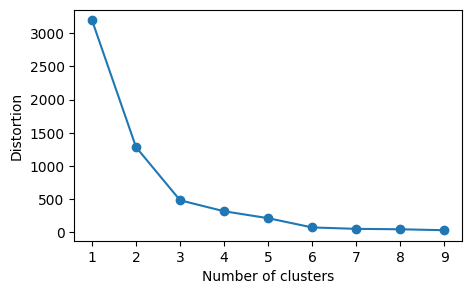

In [ ]:
from aux_functions import elbow_kmeans, silhouette_metric

distortions = elbow_kmeans(X, 10)


### Silhoutte score

Similarly to the WCSS, the Silhouette score is a metric used to evaluate how good clustering results are in data clustering.

This score is calculated by measuring each data point’s similarity to the cluster it belongs to and how different it is from other clusters (within and between distance).

1. For each data point, the average distance (a_i) to other data points within the same cluster is calculated. This value represents the **similarity** level of the data point to others in its cluster.

2. For each data point, the average distance (b_i) to all other clusters it doesn’t belong to is computed. This value indicates how **different** the data point is from data points in other clusters.

3. The cluster Silhouette score is calculated using the formula:
$$
\text{CSS}(i) = \frac{b_i - a_i}{\max(a_i, b_i)}
$$
4. By taking the average of the Silhouette scores calculated for each data point, an overall Silhouette score is obtained, which measures the success of clustering results.
$$
\text{Silhouette Score (SS)}=\frac{\sum_{i=i}^k CSS(i)}{k}.
$$



| SS | Interpretation |
| :---: | --- |
| $0.71$ to $1$ | A strong structure has been found |
| $0.51$ to $0.7$ | A reasonable structure has been found |
| $0.26$ to $0.5$ | The structure is weak and could be artificial |
| $\leq 0.25$ | No substantial structure has been found |


The Silhouette score is commonly used to assess the performance of clustering algorithms and like the elbos method can help to identify an optimum number of clusters.

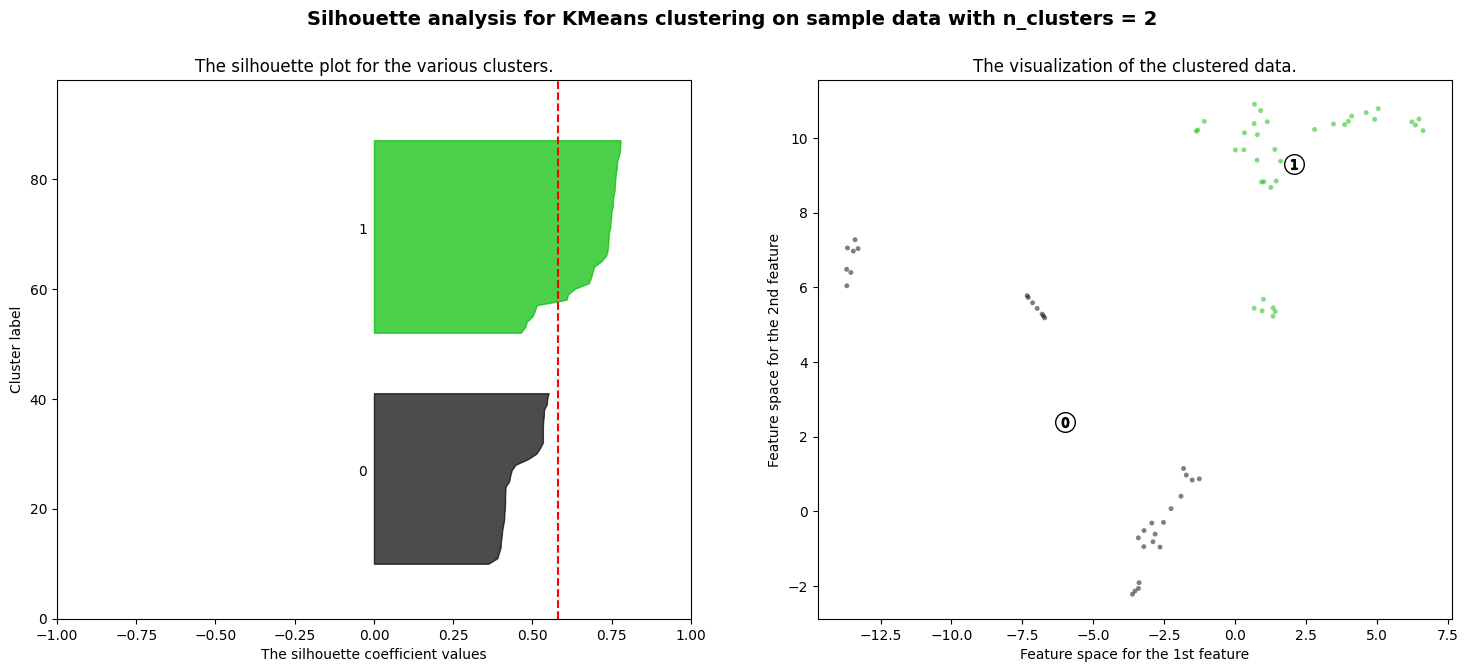

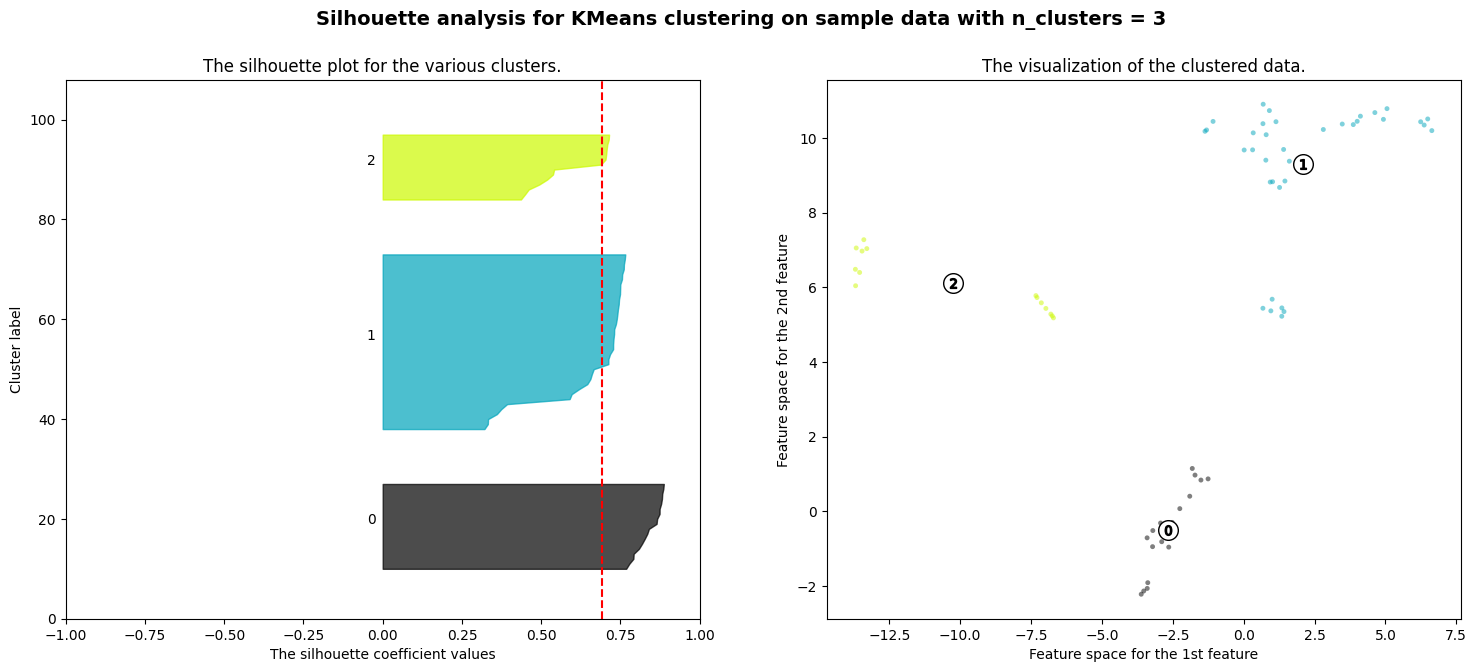

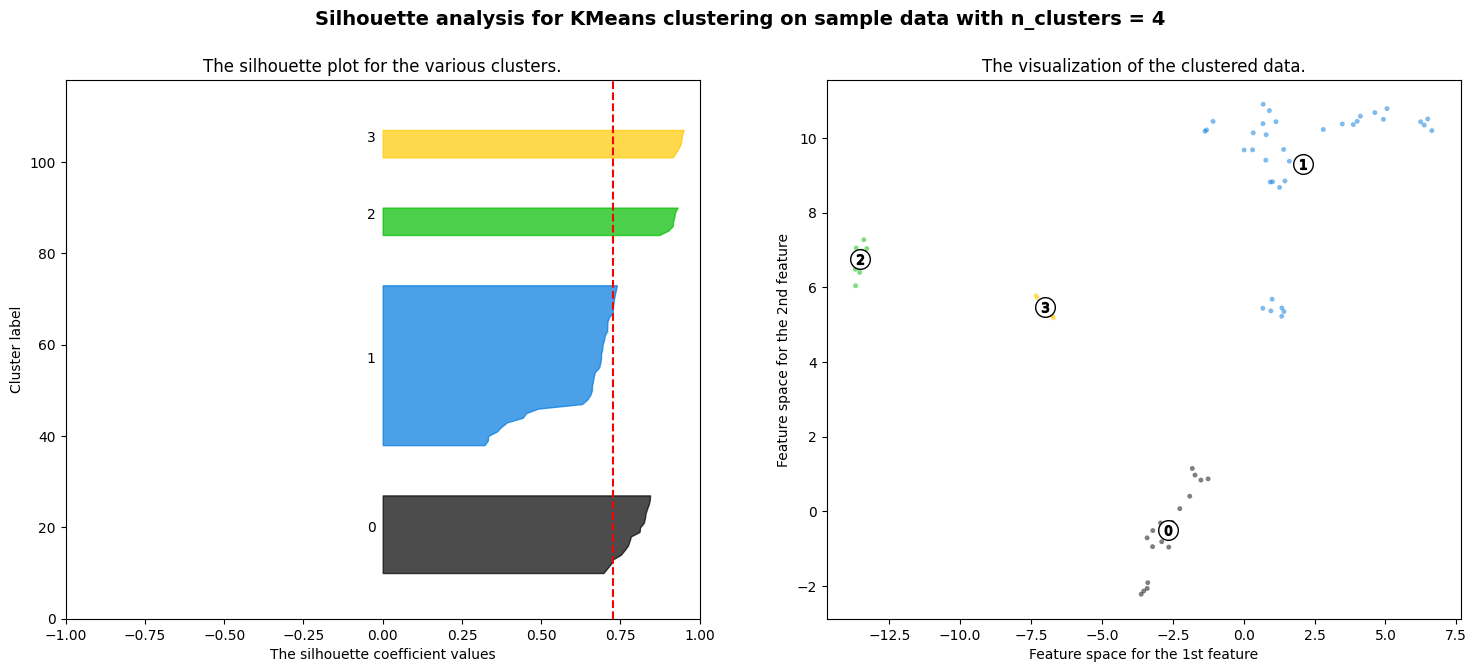

In [ ]:
sil_values = silhouette_metric(X, [2,3,4])

In [ ]:
sil_values

[np.float32(0.5817865), np.float32(0.69251245), np.float32(0.7251826)]

## Self evaluation poll (10 min)

To reinforce your learning from the session “Clustering Evaluation in Microbiome Research”, please complete the short quiz below. It features multiple-choice questions on essential topics such as clustering evaluation.

🧪 Start the quiz here:
👉 [Link to Poll, Quiz 5](https://pollev.com/biotrainaicabana135)

This quick assessment will help solidify your understanding and support your next steps in microbiome data analysis, interpretation and evaluation.